<!--BOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="figures/kep.png" height=75 width=75>
*This notebook uses routines from [PyKE](http://github.com/keplerGO/PyKE/) which is documented [here](http://pyke.keplerscience.org/). You can find these notebooks on [GitHub](https://github.com/christinahedges/k2torials)*

<!--NAVIGATION-->
< [Querying NExSci](01.01-Querying-NEXSci.ipynb) | [Contents](index.ipynb) | [What are Light Curve Files?](01.03-Investigating-LC-Files.ipynb) >

# What are Target Pixel Files?

From MAST we have obtained a target pixel file. Using PyKE we can take a look at what is inside the file. 

In [67]:
from pyke import targetpixelfile as tpf
h = tpf.KeplerTargetPixelFile('data/kplr006922244-2010078095331_lpd-targ.fits.gz','kepler-pipeline')

We've opened the fits file and labeled all the contents as 'h'. Let's take a look at the 'header' of the file, which contains information about the data set.

In [39]:
h.header(0)

SIMPLE  =                    T / conforms to FITS standards                     
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T / file contains extensions                       
NEXTEND =                    2 / number of standard extensions                  
EXTNAME = 'PRIMARY '           / name of extension                              
EXTVER  =                    1 / extension version number (not format version)  
ORIGIN  = 'NASA/Ames'          / institution responsible for creating this file 
DATE    = '2015-09-23'         / file creation date.                            
CREATOR = '917482 TargetPixelExporterPipelineModule' / pipeline job and program 
PROCVER = 'svn+ssh://murzim/repo/soc/tags/release/9.3.25 r60410' / SW version   
FILEVER = '6.1     '           / file format version                            
TIMVERSN= 'OGIP/93-003'     

Some parts of this information we already know. For example we know that that 'KEPLERID' is 6922244. Some of this information is based on the Kepler Input Catalog (KIC), such as the temperature, radius and color of the star. Most of the other information is about the telescope itself, such as the module number, and where it was pointing, such as the RA and Dec of the source.

The actual images the telescope took are in the second extention. Let's take a look at that now. Rather than print all the data, we can just find the column names. These are all explained in more detail in the second extention header (which you can access by typing 'h.header(1)').

In [40]:
h.header(1)

XTENSION= 'BINTABLE'           / marks the beginning of a new HDU               
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  728 / length of first array dimension                
NAXIS2  =                 4397 / length of second array dimension               
PCOUNT  =                    0 / group parameter count (not used)               
GCOUNT  =                    1 / group count (not used)                         
TFIELDS =                   13 / number of table fields                         
TTYPE1  = 'TIME    '           / column title: data time stamps                 
TFORM1  = 'D       '           / column format: 64-bit floating point           
TUNIT1  = 'BJD - 2454833'      / column units: barycenter corrected JD          
TDISP1  = 'D14.7   '           / column display format                          
TTYPE2  = 'TIMECORR'        

It is the TIME, FLUX and FLUX_ERR columns that we are most interested in. In order to view this data let's first take a look at the shape of it. 

In [48]:
h.shape

(4028, 5, 5)

The FLUX data is a 4028x5x5 array. (PyKE has trimmed out bad cadences for you, including safe modes, coarse points and thruster firings.) The first axis is the 'time' axis, and the images themselves are 5 pixels by 5 pixels. Let's take a look at the first image.

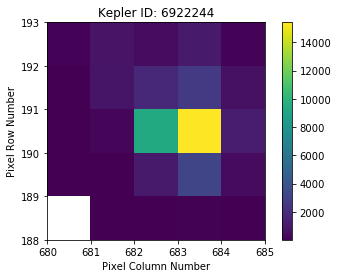

In [59]:
import matplotlib.pyplot as plt
%matplotlib inline
h.plot(0)

There are one of these images for every Kepler cadence. Each of the pixels are 4 arcseconds ($4"$) across. The point spread function (PSF) of the source makes the light from the star fall into several different pixels. This can be seen in the image above. Because of this we have to sum up many pixels in order to collect all the light from the source. To do this we can sum up all the pixels in an 'aperture'. An aperture is a mask where we take only some pixels which are roughly only related to the star in question. This is generated by the original Kepler pipeline. Let's take a look at the original aperture mask

In [65]:
h.aperture_mask

array([[False, False, False, False, False],
       [False, False,  True,  True, False],
       [False, False,  True,  True, False],
       [False,  True,  True,  True, False],
       [False, False, False,  True, False]], dtype=bool)

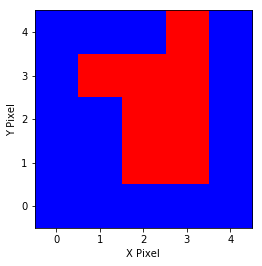

In [66]:
plt.imshow(h.aperture_mask,cmap=plt.get_cmap('bwr'),origin='bottom')
plt.xlabel('X Pixel')
plt.ylabel('Y Pixel')

Now that we have the aperture we can create a Simple Aperture Photometry light curve in the next notebook.

<!--NAVIGATION-->
< [Querying NExSci](01.01-Querying-NEXSci.ipynb) | [Contents](index.ipynb) | [What are Light Curve Files?](01.03-Investigating-LC-Files.ipynb) >